## 多能量画图

In [28]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import sys

import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# fpath_nce = r'\\10.68.0.17\users\pzmao\pFindCooperation\202503_imide_position\20250405_Multi-HCD\result\search_constrain\result\pFind-Filtered_NCE.spectra'
# fpath_nce = r'\\10.68.0.17\users\pzmao\pFindCooperation\202503_imide_position\20250405_Multi-HCD\result\20240409_NCEshuffle_search_constrain\result\pFind-Filtered_NCE.spectra'
# fpath_nce = r'\\10.68.0.17\users\pzmao\pFindCooperation\202503_imide_position\20250405_Multi-HCD\result\20250409_NCEsequential_search_constrain\result\pFind-Filtered_NCE.spectra'
# fpath_nce = r'\\10.68.0.17\users\pzmao\pFindCooperation\202503_imide_position\20250405_Multi-HCD\result\20250418_stepHCD_35trigger_constrain\result\pFind-Filtered_NCE.spectra'
# fpath_nce = r'\\10.68.0.17\users\pzmao\pFindCooperation\202503_imide_position\20250405_Multi-HCD\result\20250418_stepHCD_40trigger_constrain\result\pFind-Filtered_NCE.spectra'
fpath_nce = r'\\10.68.0.17\users\pzmao\pFindCooperation\202503_imide_position\20250405_Multi-HCD\result\20250623_stepHCD_35trigger_constrain\result\pFind-Filtered_NCE.spectra'

dpath_save = str(Path(fpath_nce).parent)

# 特征离子信息Characteristic ion
# 注意：质量不带电荷，即不加质子质量
dct_chrc = {'Linlm':214.1317315, 'Cyclm':197.1051845}

# 触发的能量
nce_trigger = '35'
# nce_trigger = '40'

# 连续采集的能量
# nce_ls = ['21', '24', '27', '30', '33', '36', '39']
# nce_ls = ['24,39', '27', '30,39', '33,39', '24,42', '27,42', '30', '39']
# nce_ls = ['30', '24,39', '30,39', '33,39', '24,42', '27,42', '39']
# nce_ls = ['30', '24,39', '30,39', '24,42', '27,42', '33,39', '39']
nce_ls = ['27', '30', '27,39', '30,39', '33,39', '27,42', '39', '42']

col_grp = 'rawscan_master'

y2_min = 65
y2_max = 103
# y2_min = 0
# y2_max = 103

In [30]:
df_nce = pd.read_csv(fpath_nce, sep='\t')
print(df_nce.shape)
print(df_nce.columns)

(1701, 61)
Index(['File_Name', 'Scan_No', 'Exp.MH+', 'Charge', 'Q-value', 'Sequence',
       'Calc.MH+', 'Mass_Shift(Exp.-Calc.)', 'Raw_Score', 'Final_Score',
       'Modification', 'Specificity', 'Proteins', 'Positions', 'Label',
       'Target/Decoy', 'Miss.Clv.Sites', 'Avg.Frag.Mass.Shift', 'Others',
       'modi_dct', 'is_modi', 'rawname', 'scannum', 'charge_title', 'pparseid',
       'rawscan', 'rawscan_c', 'Title', 'seq_str', 'seq_mod_str', 'pep_str',
       'prec_str', 'psm_str', 'rawscan_master', 'NCE', 'pep_max', 'pep_cnt',
       'charge_equal', 'res_id', 'pep_len', 'cov_b', 'cov_y', 'cov_by', 'n_b',
       'n_y', 'n_by', 'inten_b', 'inten_y', 'inten_by', 'cov_inten_b',
       'cov_inten_y', 'cov_inten_by', 'modi_site', 'modi_site_3quantile',
       'is_Linlm', 'inten_Linlm', 'inten_Linlm_match_median', 'is_Cyclm',
       'inten_Cyclm', 'inten_Cyclm_match_median', 'match_median_inten'],
      dtype='object')


In [31]:
df_nce['NCE'] = df_nce['NCE'].astype(str)

# 去掉trigger能量的行
df_nce = df_nce[df_nce['NCE'] != nce_trigger]
print(df_nce.shape)

# 只保留nce_ls中的能量
df_nce = df_nce[df_nce['NCE'].isin(nce_ls)]

# 按照能量排序
# df_nce['NCE_sort'] = df_nce['NCE'].apply(lambda x: nce_ls.index(x))
# df_nce = df_nce.sort_values(by=[col_grp, 'NCE_sort'])


# 把 NCE 转成有序的 Categorical
df_nce['NCE'] = pd.Categorical(df_nce['NCE'], categories=nce_ls, ordered=True)
df_nce = df_nce.sort_values(by=[col_grp, 'NCE'])

df_nce.reset_index(drop=True, inplace=True)

print(df_nce['NCE'].value_counts())

# df_nce['NCE'].info()

(1512, 61)
NCE
27       189
30       189
27,39    189
30,39    189
33,39    189
27,42    189
39       189
42       189
Name: count, dtype: int64


## 特征离子出现

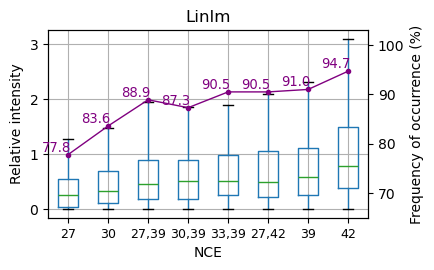

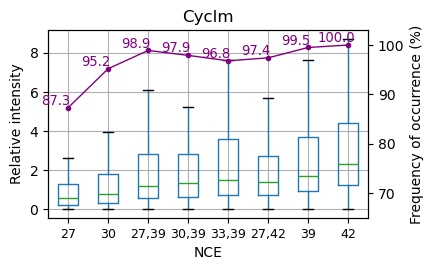

In [32]:
def plot_chrc(df_nce, chrc_name, fpath_save='', fig_format='pdf'):

    col_is = f'is_{chrc_name}'
    # col_inten =  f'inten_{chrc_name}'
    col_inten = f'inten_{chrc_name}_match_median'

    fig, ax = plt.subplots(figsize=(4, 2.5))

    # 按照能量分组, col_inten的箱线图

    # 箱线图
    df_nce.boxplot(column=col_inten, by='NCE', ax=ax, grid=True, showfliers=False)

    # 小提琴图
    # sns.violinplot(x='NCE', y=col_inten, data=df_nce, ax=ax, scale='width', inner=None, linewidth=0.5)

    # 隐藏自动生成的标题
    plt.suptitle('')  # 清除主标题
    ax.set_title('')  # 清除子标题
    ax.set_xlabel('NCE')  # 设置x轴标签
    # ax.set_ylabel('Intensity (ratio to med. frag.)')  # 设置y轴标签
    ax.set_ylabel('Relative intensity')  # 设置y轴标签

    # 获取箱线图使用的x轴位置和标签
    x_positions = [tick.get_loc() for tick in ax.xaxis.get_major_ticks()]
    x_labels = [tick.get_text() for tick in ax.get_xticklabels()]

    # # 右侧的y轴, 紫色
    ax2 = ax.twinx()
    df_rate = df_nce.groupby('NCE', observed=True)[col_is].mean().reset_index(drop=False)
    # 百分数保留1位小数
    df_rate[col_is] = df_rate[col_is].apply(lambda x: round(x * 100, 1))
    ax2.plot(x_positions, df_rate[col_is], color='purple', marker='o', linewidth=1, markersize=3, label=col_is)

    # 显示数值, 加粗
    for i, v in enumerate(df_rate[col_is]):
        ax2.text(x_positions[i]-0.3, v + 0.01, f'{v:.1f}', ha='center', va='bottom', fontsize=9.5, color='purple')

    # # df_rate.plot(ax=ax2, color='orange', marker='o', linewidth=1, markersize=3, legend=False)
    # ax2.set_ylabel(f'Rate of Occurrence')
    # ax2.set_ylim(0.0, 1.03)  # 设置y轴范围
    ax2.set_ylabel(f'Frequency of occurrence (%)')
    ax2.set_ylim(y2_min, y2_max)  # 设置y轴范围

    # x轴刻度对齐
    # Set the same x-axis ticks and labels as the primary axis
    ax2.set_xticks(x_positions)
    ax2.set_xticklabels(x_labels, fontdict={'fontsize': 5}) #设置字号似乎没用
    ax2.set_xlim(ax.get_xlim())  # Match x-axis limits

    # 设置横轴标签的字体大小
    for _label in ax.get_xticklabels(): _label.set_fontsize(9)


    plt.title(f'{chrc_name}')
    if fpath_save:
        if Path(fpath_save).is_dir():
            fpath_save = str(Path(fpath_save)/f'1_{chrc_name}')

        if fig_format == 'svg':
            fpath_save += '.svg'
            plt.savefig(fpath_save, bbox_inches='tight', dpi=800, format='svg', transparent=True)
        elif fig_format == 'pdf': # 保存为 PDF 矢量图
            fpath_save += '.pdf'
            plt.savefig(fpath_save, 
                        bbox_inches='tight', # 裁剪白边
                        dpi=800, # 分辨率
                        format='pdf', 
                        transparent=True # 透明背景
                        )
    plt.show()


for chrc_name in dct_chrc.keys():
    plot_chrc(df_nce, chrc_name, fpath_save=dpath_save)


## 位置分组

In [33]:
df_nce['modi_site_3quantile'].value_counts()

modi_site_3quantile
2    640
1    536
3    336
Name: count, dtype: int64

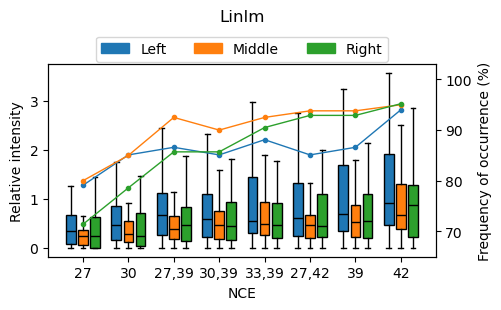

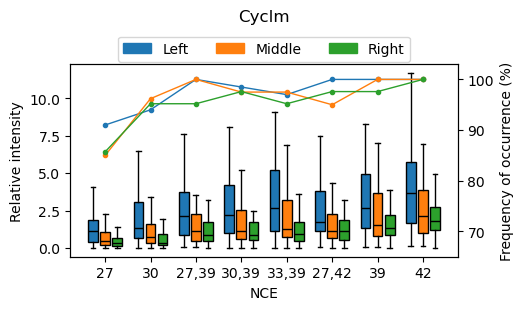

In [34]:
def plot_chrc_3s(df_nce, chrc_name, fpath_save='', fig_format='pdf'):

    col_is = f'is_{chrc_name}'
    # col_inten =  f'inten_{chrc_name}'
    col_inten = f'inten_{chrc_name}_match_median'

    # col_q为一簇, 按照能量分组, col_inten的箱线图
    col1 = 'NCE'
    col2 = 'modi_site_3quantile'
    col3 = col_inten

    # 获取唯一值
    unique_col1 = df_nce[col1].unique()
    unique_col2 = sorted(df_nce[col2].unique())

    # 计算每组的位置
    n_groups = len(unique_col1)
    n_subgroups = len(unique_col2)
    total_width = 0.8
    subgroup_width = total_width / n_subgroups

    # 初始化图形
    fig, ax = plt.subplots(figsize=(5, 2.5))
    
    # 遍历每一组
    for i, v1 in enumerate(unique_col1):
        for j, v2 in enumerate(unique_col2):
            # 筛选数据
            data = df_nce[(df_nce[col1] == v1) & (df_nce[col2] == v2)][col3]
            # 计算箱线图的位置
            pos = i + (j - (n_subgroups - 1) / 2) * subgroup_width
            # 绘制箱线图
            ax.boxplot(data, positions=[pos], widths=subgroup_width * 0.8,
                       patch_artist=True, 
                       boxprops=dict(facecolor=f'C{j}'),
                    #    labels=[f'{v1}-{v2}'],
                       showfliers=False,
                       medianprops=dict(color='black') # 中位数颜色
                       )
    
    # 隐藏自动生成的标题
    plt.suptitle('')  # 清除主标题
    ax.set_title('')  # 清除子标题
    ax.set_xticks(range(n_groups))
    ax.set_xticklabels(unique_col1)
    ax.set_xlabel('NCE')  # 设置x轴标签
    # ax.set_ylabel('Intensity (ratio to med. frag.)')  # 设置y轴标签
    ax.set_ylabel('Relative intensity')  # 设置y轴标签
    
    
    # # # 右侧的y轴
    ax2 = ax.twinx()
    for j, v2 in enumerate(unique_col2):
        _df = df_nce[(df_nce[col2] == v2)]
        _df = _df.groupby('NCE', observed=True)[col_is].mean().reset_index(drop=False)
        # 百分数保留1位小数
        _df[col_is] = _df[col_is].apply(lambda x: round(x * 100, 1))
        ax2.plot(_df[col_is], color=f'C{j}', marker='o', linewidth=1, markersize=3, label=v2)

    # ax2.set_ylabel(f'Rate of Occurrence')
    # ax2.set_ylim(0.0, 1.03)  # 设置y轴范围
    ax2.set_ylabel(f'Frequency of occurrence (%)')
    ax2.set_ylim(y2_min, y2_max)  # 设置y轴范围


    # 添加图例
    # legend_handles = [plt.Rectangle((0, 0), 1, 1, color=f'C{i}', label=v) for i, v in enumerate(unique_col2)]
    legend_handles = [plt.Rectangle((0, 0), 1, 1, color=f'C{i}', label=v) for i, v in enumerate(['Left', 'Middle', 'Right'])]
    # 放在顶部，一行三个
    ax.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, 1.18), ncol=3) # , title='Modified position'


    # 向上一点
    plt.title(f'{chrc_name}', y=1.18)  # 默认y=1.0，增大数值可上移标题

    if fpath_save:
        if Path(fpath_save).is_dir():
            fpath_save = str(Path(fpath_save)/f'2_{chrc_name}_site3q')

        if fig_format == 'svg':
            fpath_save += '.svg'
            plt.savefig(fpath_save, bbox_inches='tight', dpi=800, format='svg', transparent=True)
        elif fig_format == 'pdf': # 保存为 PDF 矢量图
            fpath_save += '.pdf'
            plt.savefig(fpath_save, 
                        bbox_inches='tight', # 裁剪白边
                        dpi=800, # 分辨率
                        format='pdf', 
                        transparent=True # 透明背景
                        )
    plt.show()


for chrc_name in dct_chrc.keys():
    plot_chrc_3s(df_nce, chrc_name, fpath_save=dpath_save)


## 序列覆盖率

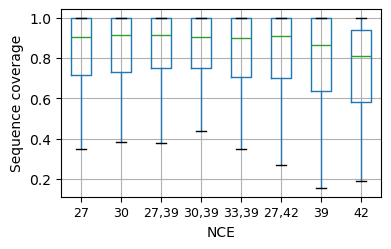

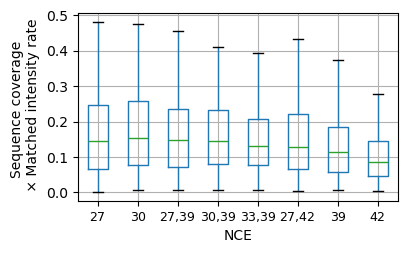

In [35]:
def plot_seq(df_nce, col, fpath_save='', fig_format='pdf'):

    fig, ax = plt.subplots(figsize=(4, 2.5))

    # 按照能量分组, col_inten的箱线图

    # 箱线图
    df_nce.boxplot(column=col, by='NCE', ax=ax, grid=True, showfliers=False)

    # 小提琴图
    # sns.violinplot(x='NCE', y=col, data=df_nce, ax=ax) #, density_norm='width', inner=None, linewidth=0.5)

    # 隐藏自动生成的标题
    plt.suptitle('')  # 清除主标题
    ax.set_title('')  # 清除子标题
    ax.set_xlabel('NCE')  # 设置x轴标签
    ax.set_ylabel(col2ylabel[col])  # 设置y轴标签

    # 设置横轴标签的字体大小
    for _label in ax.get_xticklabels(): _label.set_fontsize(9)

    if fpath_save:
        if Path(fpath_save).is_dir():
            fpath_save = str(Path(fpath_save)/f'3_{col}_site3q')

        if fig_format == 'svg':
            fpath_save += '.svg'
            plt.savefig(fpath_save, bbox_inches='tight', dpi=800, format='svg', transparent=True)
        elif fig_format == 'pdf': # 保存为 PDF 矢量图
            fpath_save += '.pdf'
            plt.savefig(fpath_save, 
                        bbox_inches='tight', # 裁剪白边
                        dpi=800, # 分辨率
                        format='pdf', 
                        transparent=True # 透明背景
                        )
    plt.show()  


col2ylabel = {'cov_by': 'Sequence coverage', 'cov_inten_by': 'Sequence coverage \n × Matched intensity rate'}

for col in col2ylabel.keys():
    plot_seq(df_nce, col, fpath_save=dpath_save)